In [1]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [3]:
data = pd.read_csv('UK_monthly_gdp.csv')
data.head()

,Time Period,GDP Growth
0,/01/2020,0.3
1,/02/2020,-0.5
2,/03/2020,-7.0
3,/04/2020,-20.9
4,/05/2020,3.2


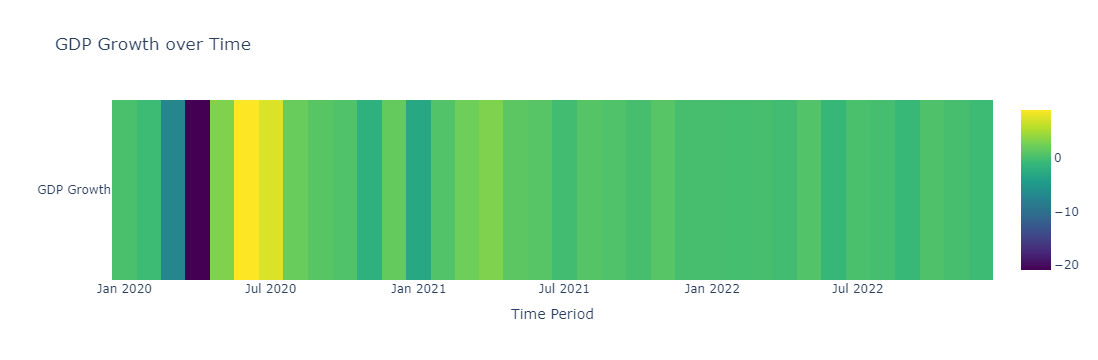

In [9]:
fig = go.Figure(data=go.Heatmap(
                   z=[data['GDP Growth']],
                   x=data.index,
                   y=['GDP Growth'],
                   colorscale='Viridis'))

fig.update_layout(title='GDP Growth over Time',
                  xaxis_title='Time Period',
                  yaxis_title='')

fig.show()

In [5]:
# Convert monthly data to quarterly data using resample method
data['Time Period'] = pd.to_datetime(data['Time Period'], format='/%m/%Y')
data.set_index('Time Period', inplace=True)
quarterly_data = data.resample('Q').mean()
quarterly_data.head()

,GDP Growth
Time Period,
2020-03-31,-2.400000
2020-06-30,-2.900000
2020-09-30,3.500000
2020-12-31,0.200000
2021-03-31,0.033333


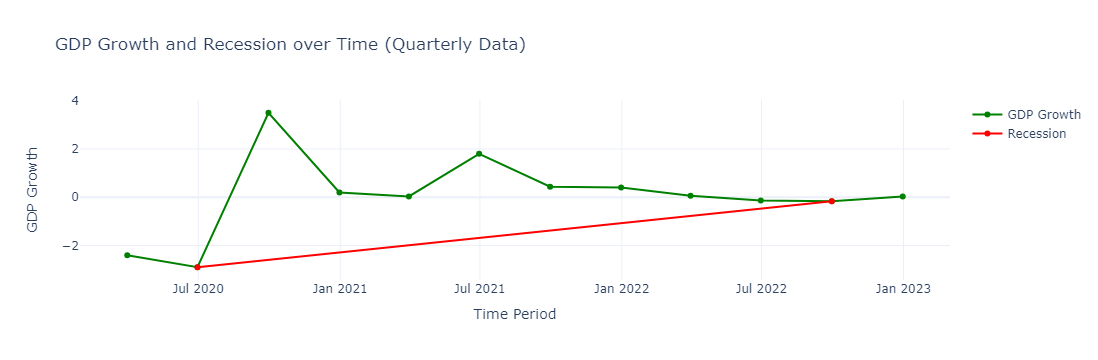

In [6]:
# Calculate recession based on quarterly GDP growth
quarterly_data['Recession'] = ((quarterly_data['GDP Growth'] < 0) & (quarterly_data['GDP Growth'].shift(1) < 0))

# Fill missing values with False (since the first quarter cannot be in a recession)
quarterly_data['Recession'].fillna(False, inplace=True)

# Plot the GDP growth and recession data
fig = go.Figure()
fig.add_trace(go.Scatter(x=quarterly_data.index, 
                         y=quarterly_data['GDP Growth'], 
                         name='GDP Growth', 
                         line=dict(color='green', width=2)))
fig.add_trace(go.Scatter(x=quarterly_data[quarterly_data['Recession']].index, 
                         y=quarterly_data[quarterly_data['Recession']]['GDP Growth'], 
                         name='Recession', line=dict(color='red', width=2)))

fig.update_layout(title='GDP Growth and Recession over Time (Quarterly Data)',
                  xaxis_title='Time Period',
                  yaxis_title='GDP Growth')

fig.show()

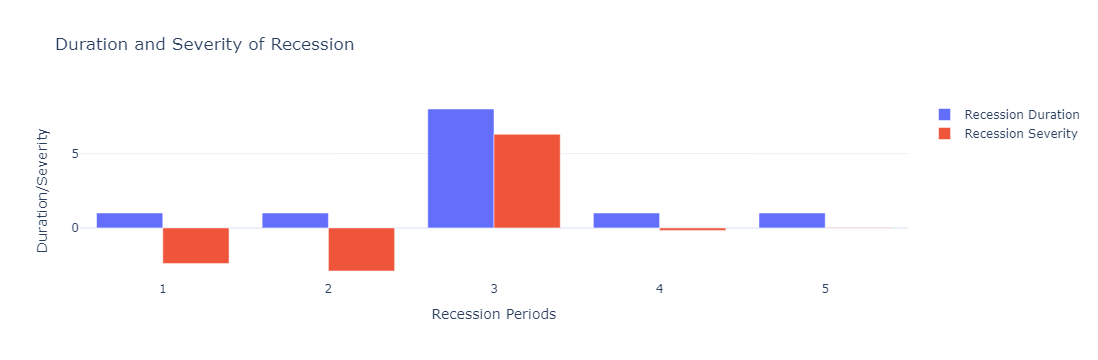

In [7]:
quarterly_data['Recession Start'] = quarterly_data['Recession'].ne(quarterly_data['Recession'].shift()).cumsum()
recession_periods = quarterly_data.groupby('Recession Start')
recession_duration = recession_periods.size()
recession_severity = recession_periods['GDP Growth'].sum()

fig = go.Figure()
fig.add_trace(go.Bar(x=recession_duration.index, y=recession_duration,
                     name='Recession Duration'))
fig.add_trace(go.Bar(x=recession_severity.index, y=recession_severity,
                     name='Recession Severity'))

fig.update_layout(title='Duration and Severity of Recession',
                  xaxis_title='Recession Periods',
                  yaxis_title='Duration/Severity')

fig.show()